In [2]:
import csv
import matplotlib.pyplot as plt
from operator import itemgetter, attrgetter
import pandas as pd
import seaborn as sn
import math
import scipy.spatial as spatial
import scipy.stats as stats

In [4]:
#Constants
PENTALY_FOR_NOT_FINISHING = 60 #900s is 15 min computation time
INTERESTING_PATHS = [
    '../case-studies/randomModels/10-actions-models-good/',
    '../scripts/output/',
    '../scripts/generated-extend/',
    '../scripts/random-tree-test/'
]
PATH_TO_CSV_FOLDER = INTERESTING_PATHS[3]

## Prepare Data

In [10]:
property_meta_keys = ["Model"]

property_keys = [
    "NumStates",
    "NumActions",
    "NumTargets",
    "NumSinks",
    "NumUnknown",
    "NumMaxActions",
    "NumMaxTransitions",
    "SmallestTransProb",
    "NumProbActions",
    "NumMECs",
    "BiggestMEC",
    "SmallestMEC",
    "AvgMEC",
    "MedianMEC",
    "NumSCCs"
]

analysis_keys = property_meta_keys + property_keys

table_properties = []
with open(PATH_TO_CSV_FOLDER+'analysis.csv', newline='\n') as propertiesFile:
        reader = csv.DictReader(propertiesFile)
        for row in reader:
            row_to_include = {k:row[k] for k in analysis_keys if k in row}

            #Filtering
            if (row_to_include["NumStates"] == " "):
                continue
            elif (int(row_to_include["NumUnknown"]) == 0):
                continue
            else:
                table_properties.append(row_to_include)

print("With filtering there are %d models left to check" % len(table_properties))

With filtering there are 389 models left to check


In [11]:
metaKeys = ["Model", "#States"]

config_keys = [
    "BVI_1",
    "BVI_100",
    "GSVI_100",
    "OVI_1",	
    "SVI_100",
    "TBVI_100",
    "TGOVI_1",
    "TGSVI_100",
    "VI",
]

relevantKeys = metaKeys + config_keys
relevantKeys

['Model',
 '#States',
 'BVI_1',
 'BVI_100',
 'GSVI_100',
 'OVI_1',
 'SVI_100',
 'TBVI_100',
 'TGOVI_1',
 'TGSVI_100',
 'VI']

In [12]:
def modelIncludedInProperties(model_name, table_properties):
    for row in table_properties:
        if row["Model"] == model_name:
            return True
    return False

In [16]:
table_times = []
excluded_times = []
print("PATH: ",PATH_TO_CSV_FOLDER+'times.csv')
with open(PATH_TO_CSV_FOLDER+'times.csv', newline='\n') as timesFile:
    reader = csv.DictReader(timesFile)
    for row in reader:
        parsed_row = {k:row[k] for k in relevantKeys if k in row}

        # Filtering
        if not modelIncludedInProperties(parsed_row["Model"], table_properties):
            continue
        at_least_one_has_solved = False
        at_least_one_has_not_solved = False
        for config_key in config_keys:
            if (parsed_row[config_key] != "" and parsed_row[config_key] != " "):
                at_least_one_has_solved = True
            else:
                at_least_one_has_not_solved = True

        if (at_least_one_has_solved):
            table_times.append(parsed_row)
        else:
            print("None has solved ",parsed_row," It will not be included in the tests here")
            excluded_times.append(excluded_times)
        #table.append(row)
print("After filtering, %d models are left in total" % len(table_times))

PATH:  ../scripts/random-tree-test/times.csv
After filtering, 389 models are left in total


In [17]:
#Test Read Filed
for row in table_times:
    #print(row)
    pass

for row in table_properties:
    pass

### Apply Sorting if necessary

In [18]:
table_times = sorted(table_times, key=lambda row: int(row['#States']))
table_properties = sorted(table_properties, key=lambda row: int(row['NumStates']))

## Look at some graph to gain understanding of dataset

In [19]:
x_axis = range(len(table_times)-1)
y_axises = dict()

#Init y_axises
for row in table_times:
    for key in relevantKeys:
        if key == "#States" or key == "Model":
            continue

        if key not in y_axises:
            y_axises[key] = []
        else:
            if (row[key] == ''):
                y_axises[key].append(PENTALY_FOR_NOT_FINISHING)
            else:
                y_axises[key].append(float(row[key]))

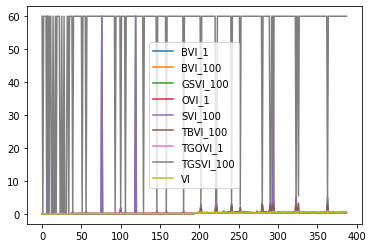

In [20]:
for config in y_axises.keys():
    plt.plot(x_axis, y_axises[config], label=config)
plt.legend()
plt.show()

### Interpret the graph

In [21]:
#Get names of models above certain threshold
threshold = 30

fastest_solver = dict()
for row in table_times:
    fastest_solver[row["Model"]] = [10000, []]
    for key in config_keys:
        if row[key] == "":
            print("Model "+row["Model"]+" was not computed by configuration "+key+". Set it's value to "+str(PENTALY_FOR_NOT_FINISHING))
            row[key] = PENTALY_FOR_NOT_FINISHING
        elif row[key] != "" and float(row[key]) > threshold:
            print("For Model "+row["Model"]+" configuration "+key+" requires "+str(row[key])+"s which is more than "+str(threshold)+"s")
            #row[key] = threshold #Clipping

        soln_time = float(row[key])
        if (soln_time != PENTALY_FOR_NOT_FINISHING):
            if (fastest_solver[row["Model"]][0] > soln_time):
                fastest_solver[row["Model"]] = [soln_time, [key]]
            elif (fastest_solver[row["Model"]][0] == soln_time):
                fastest_solver[row["Model"]][1].append(key)

Model RANDOM_Size_100_MinAct_10treeType_model_12 was not computed by configuration TGSVI_100. Set it's value to 60
Model RANDOM_Size_100_MinAct_10treeType_model_2 was not computed by configuration TGSVI_100. Set it's value to 60
Model RANDOM_Size_100_MinAct_10treeType_model_26 was not computed by configuration TGSVI_100. Set it's value to 60
Model RANDOM_Size_100_MinAct_10treeType_model_29 was not computed by configuration TGSVI_100. Set it's value to 60
Model RANDOM_Size_100_MinAct_10treeType_model_3 was not computed by configuration TGSVI_100. Set it's value to 60
Model RANDOM_Size_100_MinAct_10treeType_model_33 was not computed by configuration GSVI_100. Set it's value to 60
Model RANDOM_Size_100_MinAct_10treeType_model_33 was not computed by configuration SVI_100. Set it's value to 60
Model RANDOM_Size_100_MinAct_10treeType_model_33 was not computed by configuration TGSVI_100. Set it's value to 60
Model RANDOM_Size_100_MinAct_10treeType_model_35 was not computed by configuration TG

In [23]:
bestSolvers = dict()
for config_key in config_keys:
    bestSolvers[config_key] = 0

for row in table_times:
    model_name = row["Model"]
    for config_key in fastest_solver[model_name][1]:
        bestSolvers[config_key]+=1

for config_key in config_keys:
    print("Config %s was the best solution method %d / %d times" % (config_key, bestSolvers[config_key], len(table_times)))

Config BVI_1 was the best solution method 95 / 389 times
Config BVI_100 was the best solution method 101 / 389 times
Config GSVI_100 was the best solution method 2 / 389 times
Config OVI_1 was the best solution method 33 / 389 times
Config SVI_100 was the best solution method 5 / 389 times
Config TBVI_100 was the best solution method 55 / 389 times
Config TGOVI_1 was the best solution method 71 / 389 times
Config TGSVI_100 was the best solution method 0 / 389 times
Config VI was the best solution method 42 / 389 times


# Do classic Data Mining stuff

In [24]:
data = dict()
for key in property_keys:
        data[key] = []
for key in config_keys:
        data[key] = []

#Gather the whole data
#Highly inefficient I suppose
for i in range(len(table_times)):
        times_row = table_times[i]
        properties_row_index = -1
        for j in range(len(table_properties)):
                if table_properties[j]["Model"] == times_row["Model"]:
                        properties_row_index = j
                        break
        if (properties_row_index == -1):
                print("ERROR FOR "+times_row["Model"])

        properties_row = table_properties[properties_row_index]

        for key in property_keys:
                if (properties_row[key] == '' or properties_row[key] == ' ' or properties_row[key] == " -"):
                      data[key].append(0)
                else: 
                        data[key].append(float(properties_row[key]))
        for key in config_keys:
                if (times_row[key] == '' or times_row[key] == ' '):
                        data[key].append(PENTALY_FOR_NOT_FINISHING)
                else:
                        data[key].append(float(times_row[key]))

## Heatmaps

/home/sasha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:699: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


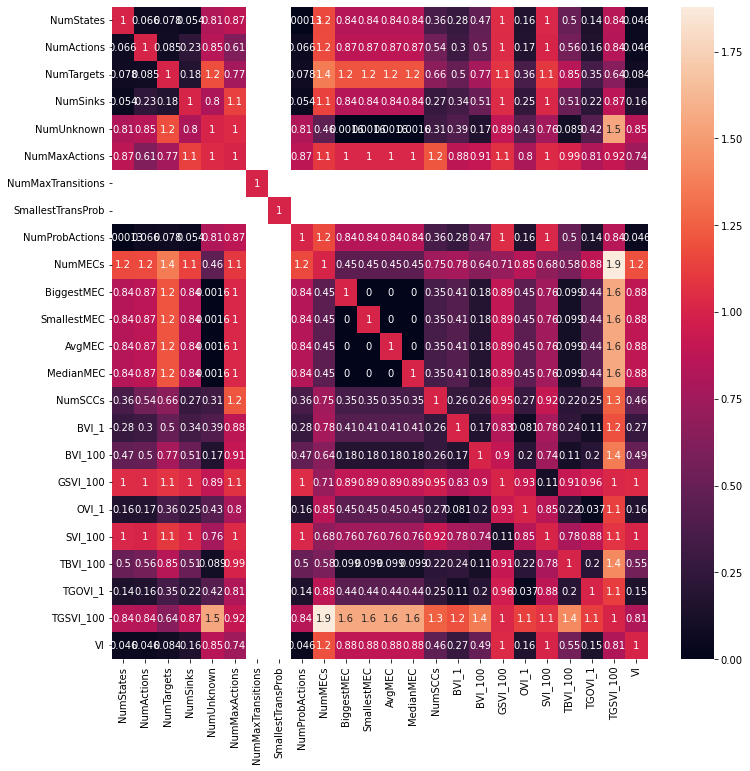

In [25]:
#Distance Correlation
fig = plt.figure(figsize=(12,12))
df = pd.DataFrame(data,columns=property_keys+config_keys)

corrMatrix = df.corr(method=spatial.distance.correlation)
sn.heatmap(corrMatrix, annot=True)
plt.show()


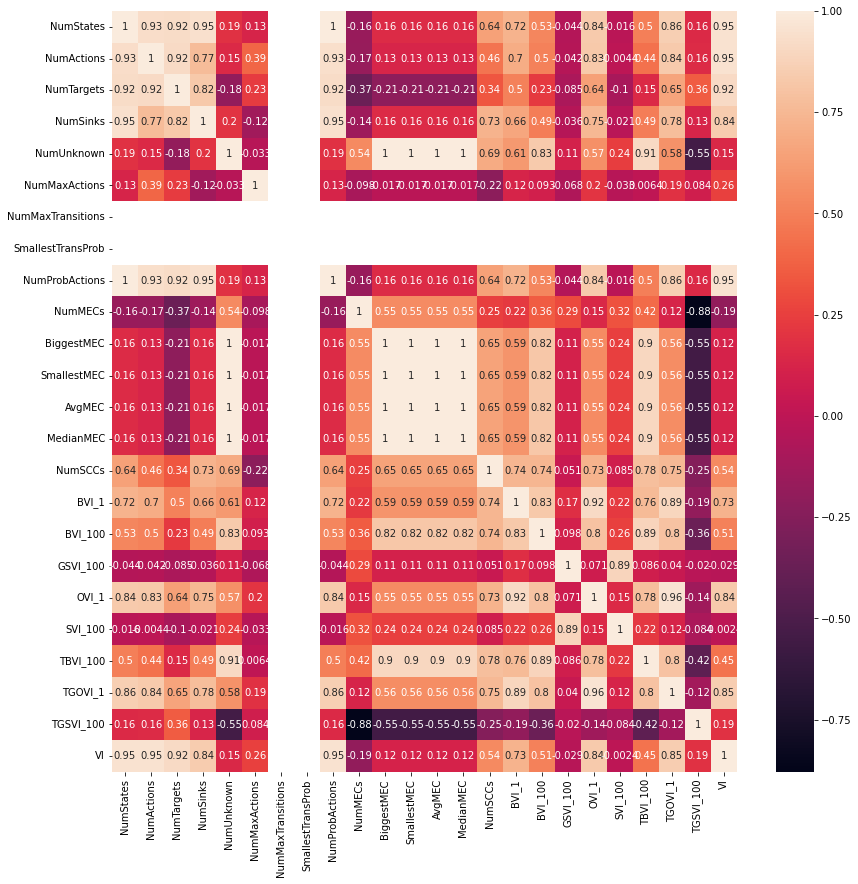

In [27]:
#Linear Correlation
fig = plt.figure(figsize=(14,14))
df = pd.DataFrame(data,columns=property_keys+config_keys)

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()


## Scatter Plots

In [32]:
#Scatterplot
def createScatterPlotForOneProperty(property_key):
    entries_per_column = int(math.sqrt(len(config_keys))+1)
    entries_per_row = entries_per_column
    fix, axs = plt.subplots(entries_per_row, entries_per_column, figsize=(16,16))
    row = 0
    column = 0
    for key in config_keys:
        if (column == entries_per_column):
            row += 1
            column = 0
        axs[row, column].scatter(data[property_key], data[key])
        axs[row, column].set_xlabel(property_key),
        axs[row, column].set_ylabel(key)
        column+=1

def createScatterPlotForMultipleProperties(property_keys):
    entries_per_column = len(config_keys)
    entries_per_row = len(property_keys)
    fix, axs = plt.subplots(entries_per_row, entries_per_column, figsize=(12,12), constrained_layout=True)
    row = 0
    column = 0
    for property_key in property_keys:
        for key in config_keys:
            if (column == entries_per_column):
                row += 1
                column = 0
            axs[row, column].scatter(data[property_key], data[key])
            axs[row, column].set_xlabel(property_key),
            axs[row, column].set_ylabel(key)
            column+=1

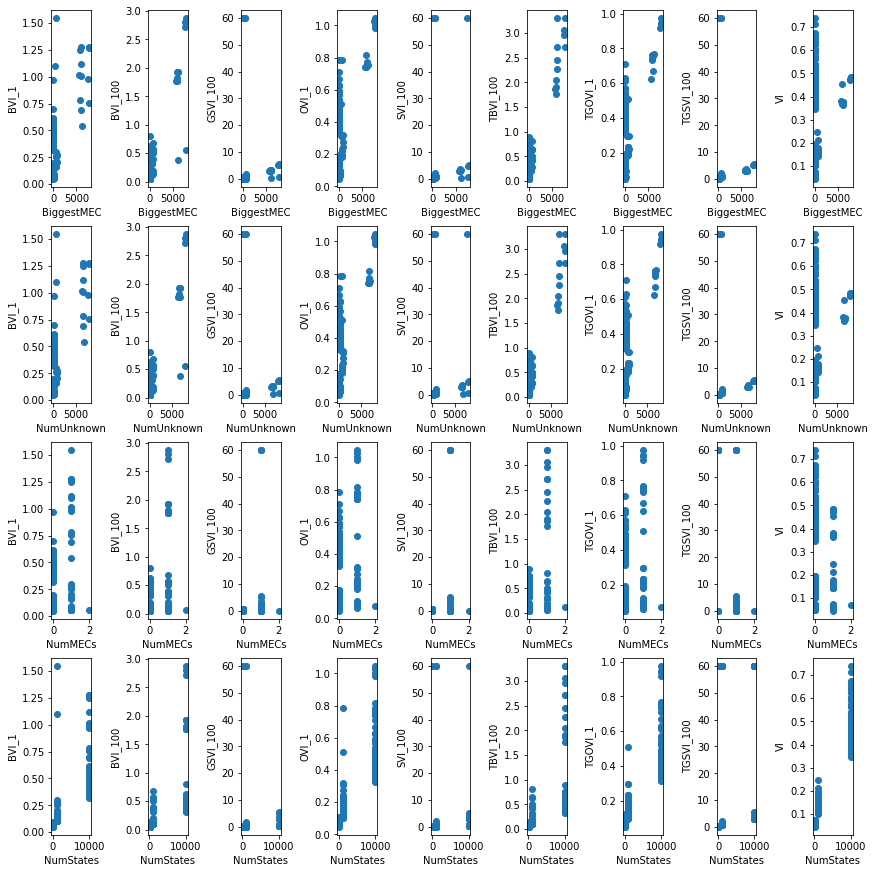

In [33]:
createScatterPlotForMultipleProperties(["BiggestMEC", "NumUnknown", "NumMECs", "NumStates"])